In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['Service Provider', 'Technology', 'Test Type', 'Data Speed', 'Signal Strength', 'State']

In [3]:
df = pd.read_csv('sept18_publish.csv', header=None, names=column_names) # when headers are not provided

In [4]:
df

,Service Provider,Technology,Test Type,Data Speed,Signal Strength,State
0,IDEA,4G,download,969.0,-98,Kerala
1,IDEA,4G,upload,307.0,-98,Kerala
2,JIO,4G,download,40073.0,-71,Kerala
3,JIO,4G,download,28948.0,-71,Kerala
4,JIO,4G,upload,10088.0,-71,Kerala
5,JIO,4G,upload,7572.0,-71,Kerala
6,JIO,4G,download,48314.0,-60,Rajasthan
7,JIO,4G,upload,8356.0,-60,Rajasthan
8,JIO,4G,download,67521.0,-92,Maharashtra
9,JIO,4G,download,68009.0,-74,Maharashtra


In [11]:
# find and display the unique states 
states = df['State'].unique()

In [12]:
states

array(['Kerala', 'Rajasthan', 'Maharashtra', 'UP East', 'Karnataka', nan,
       'Madhya Pradesh', 'Kolkata', 'Bihar', 'Gujarat', 'UP West',
       'Orissa', 'Tamil Nadu', 'Delhi', 'Assam', 'Andhra Pradesh',
       'Haryana', 'Punjab', 'North East', 'Mumbai', 'Chennai',
       'Himachal Pradesh', 'Jammu & Kashmir', 'West Bengal'], dtype=object)

In [7]:
# find and display the unique operators 
df['Service Provider'].unique()

array(['IDEA', 'JIO', 'AIRTEL', 'VODAFONE', 'CELLONE'], dtype=object)

Define the function fixed_operator, which will keep the operator constant and iterate through all the available states for that operator. We can construct a similar function for a fixed state.

In [15]:
# Network specific data frame
ntdf = df[(df['Service Provider'] == 'JIO') & (df['Technology'] == '4G')]

In [16]:
ntdf.describe()

,Data Speed
count,579567.000000
mean,12682.722828
std,18146.105333
min,0.000000
25%,1355.000000
50%,5872.000000
75%,11303.000000
max,125770.000000


In [21]:
# define lists 
final_download_speeds, final_upload_speeds = [], [] 
final_states, final_operators = [], []

# iterate through each of the states
for state in states:
    # create new dataframe which contains only the data of the current state 
    base = ntdf[ntdf['State'] == state]
    # filter only download speeds based on test type
    down = base[base['Test Type'] == 'download']
    # filter only upload speeds based on test type
    upload = base[base['Test Type'] == 'upload']
    # average donload/upload speed
    avg_down = down['Data Speed'].mean()
    avg_upload = upload['Data Speed'].mean()
    final_states.append(state) 
    final_download_speeds.append(avg_down) 
    final_upload_speeds.append(avg_upload) 
    print(str(state) + ' - Avg Download: ' + str('%.2f' % avg_down) + '/Avg Upload: ' + str('%.2f' % avg_upload))

Kerala - Avg Download: 26129.27/Avg Upload: 5193.46
Rajasthan - Avg Download: 27784.86/Avg Upload: 5736.18
Maharashtra - Avg Download: 20707.88/Avg Upload: 4130.46
UP East - Avg Download: 22451.35/Avg Upload: 5727.95
Karnataka - Avg Download: 16950.36/Avg Upload: 4720.68
nan - Avg Download: nan/Avg Upload: nan
Madhya Pradesh - Avg Download: 23594.85/Avg Upload: 4802.89
Kolkata - Avg Download: 26747.80/Avg Upload: 5655.55
Bihar - Avg Download: 31730.54/Avg Upload: 6599.45
Gujarat - Avg Download: 16377.43/Avg Upload: 3642.89
UP West - Avg Download: 23720.82/Avg Upload: 5280.46
Orissa - Avg Download: 31502.05/Avg Upload: 6895.46
Tamil Nadu - Avg Download: 16689.28/Avg Upload: 4107.44
Delhi - Avg Download: 20308.30/Avg Upload: 4877.40
Assam - Avg Download: 5653.49/Avg Upload: 2864.47
Andhra Pradesh - Avg Download: 32444.07/Avg Upload: 5755.95
Haryana - Avg Download: 7170.63/Avg Upload: 2680.02
Punjab - Avg Download: 14454.45/Avg Upload: 4981.15
North East - Avg Download: 6702.29/Avg Upload

__Plotting the Data__

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

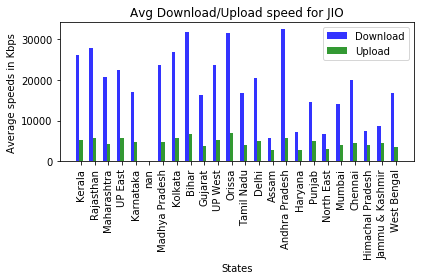

In [40]:
fig, ax = plt.subplots() 
# the width of each bar
bar_width = 0.25
# Opacity of each bar
opacity = 0.8
# store the position
index = np.arange(len(final_states))
# plot the download bars
bar_download = plt.bar(index, final_download_speeds, bar_width, alpha=opacity, color='b', label='Download')
# plot the upload bars
bar_upload = plt.bar(index + bar_width, final_upload_speeds, bar_width, alpha=opacity, color='g', label='Upload')
plt.title('Avg Download/Upload speed for JIO')
plt.xlabel('States')
plt.ylabel('Average speeds in Kbps')
# the label below each of the bars corresponsing to the states
plt.xticks(index + bar_width, final_states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()